In [11]:
import sys
sys.path.insert(0, '../')

import pandas as pd

from src.features.neural_networks import ModelFC, PyTorchWrapper
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from src.features.functions import import_data,find_best_threshold, optimize_threshold_for_accuracy, predict_classification
from src.features.plots import plot_confusion_matrix,plot_roc_curve_and_accuracy

pd.set_option('display.max_columns', None)

In [12]:
X_train, y_train, X_test, y_test = import_data()

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
model_torch = ModelFC(len(X_train.columns),len(y_train.columns),[8,8,8],0.5)
model = PyTorchWrapper(model_torch,num_epochs=10)
model.fit(X_train, y_train)

PyTorchWrapper(model=ModelFC(
  (activation): Sigmoid()
  (layers): Sequential(
    (0): Linear(in_features=29, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=8, out_features=8, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=8, out_features=1, bias=True)
  )
),
               optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.001
))

In [15]:
y_prob_val = model.predict_proba(X_val)[:, 1]

In [16]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)
auc = roc_auc_score(y_val, y_prob_val)

In [17]:
best_threshold, threshold_accuracy = find_best_threshold(fpr, tpr, thresholds, y_val, y_prob_val)

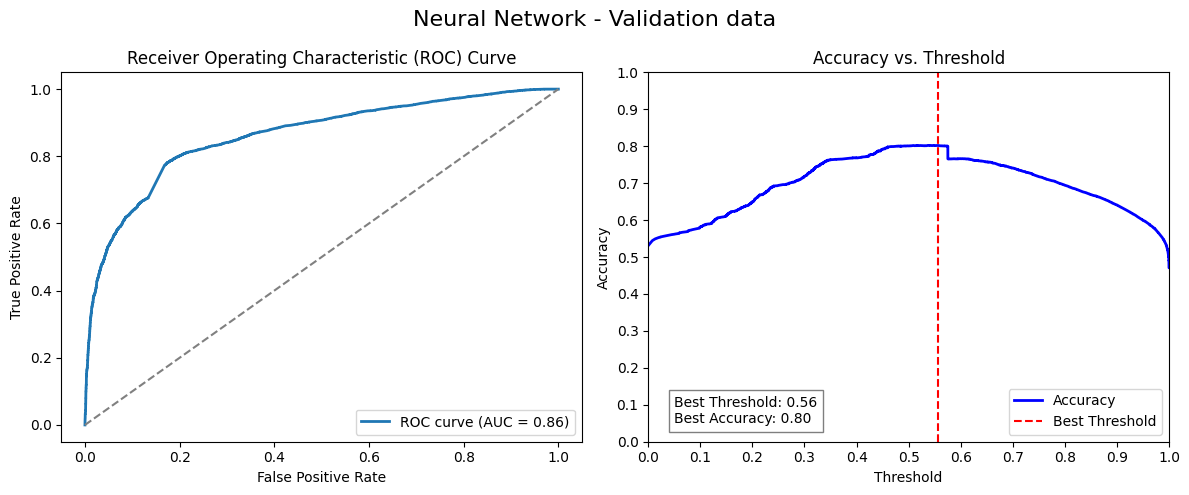

In [18]:
plot_roc_curve_and_accuracy(fpr, tpr, auc, thresholds, y_val, y_prob_val, "Neural Network - Validation data")

In [19]:
optimal_threshold, optimal_accuracy = optimize_threshold_for_accuracy(y_val, y_prob_val)
print(f"Optimal Threshold: {optimal_threshold:.3}, Accuracy: {optimal_accuracy:.3}")

Optimal Threshold: 0.556, Accuracy: 0.802


In [20]:
y_pred = predict_classification(model,X_test,y_test,optimal_threshold,True)

Evaluation metrics:
Accuracy    :	0.806
F1 score    :	0.813
Precision   :	0.843
NVP         :	0.831
Sensitivity :	0.785
Specificity :	0.831


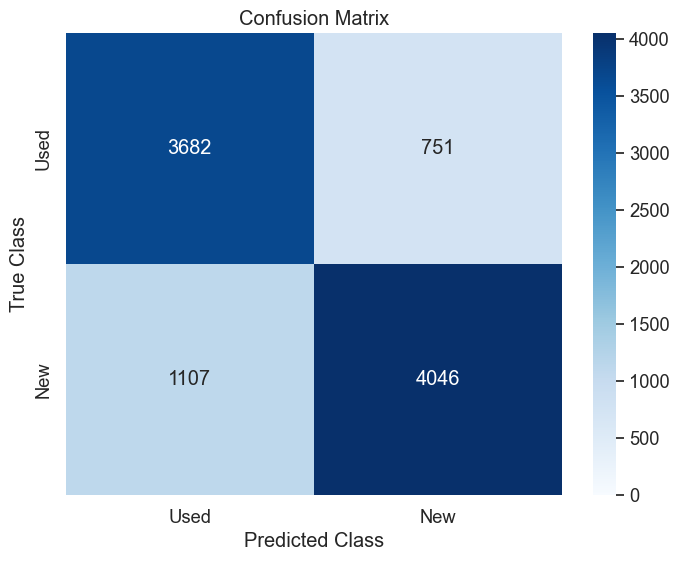

In [23]:
plot_confusion_matrix(y_test, y_pred,False,["Used","New"])